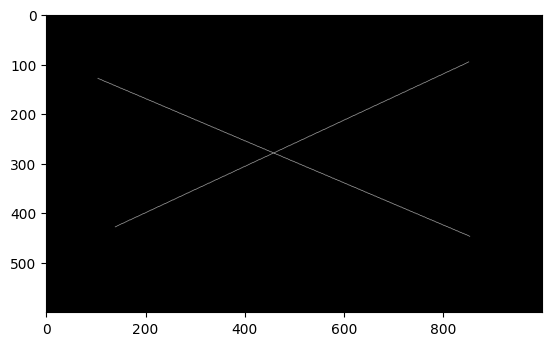

In [12]:
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from matplotlib import pyplot as plt
import math

img = cv2.imread("lines1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')


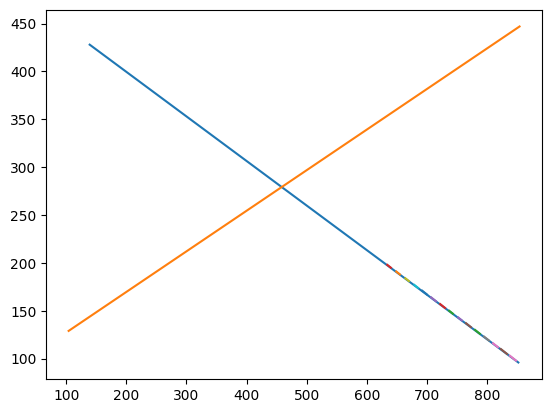

In [13]:
'''
Try Hough in scikit and visualize hough accumulator
'''
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
lines = probabilistic_hough_line(img, threshold=10, line_length=5,
                                 line_gap=3)
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))



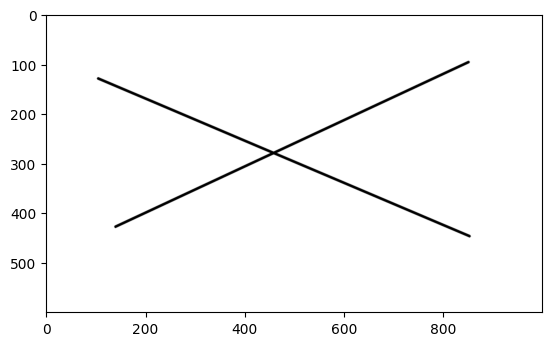

In [14]:
'''
 Hough line in opencv
 '''

# Probabilistic Line Transform
linesP = cv2.HoughLinesP(img, 1, np.pi / 180, 50, None, 50, 10)

img[:,:] = 255

    # Draw the lines
if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(img, cmap='gray')